In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.utils import np_utils

In [2]:
from google.colab import drive 
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [3]:
import numpy as np
my_imgs = np.load('/content/drive/MyDrive/Milestone 3/new-images2.npy',  allow_pickle = True)
letters = np.load('/content/drive/MyDrive/Milestone 3/new-labels2.npy',  allow_pickle = True)

In [4]:
labels = [ord(i)-97 for i in letters] #pre-processing
my_labels = np.array(labels)
print(len(my_labels))

3639


In [5]:
def expand_greyscale_image_channels(grey_image):
    grey_image_arr = np.array(grey_image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

In [6]:
import cv2
import numpy as np
jill = np.empty((3639, 224, 224, 3))
for i in range(3639):
  jill[i] = expand_greyscale_image_channels(cv2.resize(my_imgs[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR))

In [7]:
!pip install -U efficientnet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 5.3 MB/s eta 0:00:00


In [9]:
import efficientnet.keras as efn

In [10]:
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

16804768/16804768 [==============================] - 1s 0us/step


In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
predictions = Dense(26, activation="sigmoid")(x)
model_final = Model(base_model.input, predictions)

In [37]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=.000001,
    decay_steps=1000,
    decay_rate=1e-6)




model_final.compile(tf.keras.optimizers.RMSprop(lr=lr_schedule),loss="sparse_categorical_crossentropy",metrics=['accuracy'])


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(jill, my_labels, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [40]:
history = model_final.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_val, y_val))


Epoch 1/20
69/69 [==============================] - 2s 27ms/step - loss: 3.4894 - accuracy: 0.0504 - val_loss: 3.4392 - val_accuracy: 0.0288
Epoch 2/20
69/69 [==============================] - 2s 26ms/step - loss: 3.3837 - accuracy: 0.0527 - val_loss: 3.4835 - val_accuracy: 0.0288
Epoch 3/20
69/69 [==============================] - 2s 26ms/step - loss: 3.2634 - accuracy: 0.0486 - val_loss: 3.4805 - val_accuracy: 0.0288
Epoch 4/20
69/69 [==============================] - 2s 26ms/step - loss: 6.4608 - accuracy: 0.0486 - val_loss: 3.4816 - val_accuracy: 0.0288
Epoch 5/20
69/69 [==============================] - 2s 26ms/step - loss: 3.6025 - accuracy: 0.0508 - val_loss: 3.4848 - val_accuracy: 0.0288
Epoch 6/20
69/69 [==============================] - 2s 26ms/step - loss: 3.3442 - accuracy: 0.0499 - val_loss: 3.4816 - val_accuracy: 0.0288
Epoch 7/20
69/69 [==============================] - 2s 26ms/step - loss: 3.3098 - accuracy: 0.0508 - val_loss: 4.2123 - val_accuracy: 0.0288
Epoch 8/20
69

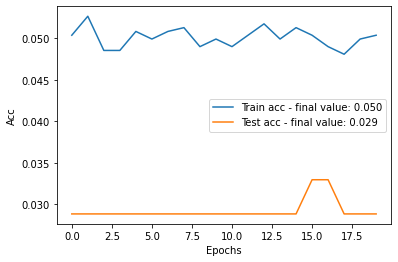

In [43]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']; val_acc = history.history['val_accuracy']
plt.plot(acc, label="Train acc - final value: %.3f"%acc[-1])
plt.plot(val_acc, label="Test acc - final value: %.3f"%val_acc[-1])
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Acc"); plt.show()

In [45]:
model_final.evaluate(X_test, y_test, verbose = 2)

23/23 - 0s - loss: 3.2766 - accuracy: 0.0247 - 476ms/epoch - 21ms/step


[3.2765707969665527, 0.024725275114178658]